### Question 1

Simple Linear Regression is a method that aims to represent the relationship between two variables, the independent variable predictor $X$ and the dependent variable outcome $Y$, using a linear model.

This gives rise to the first **key assumption**:
1. **Linearity**: The relationship between $X$ and $Y$ is linear.

The linear regression line is represented by the equation:

$$
\hat{Y}_i = \beta_0 + \beta_1 X_i
$$

where:
- $\beta_0$ is the intercept, which represents the expected value of $Y$ when $X = 0$.
- $\beta_1$ is the slope of the line, which is the change in $Y$ for every unit change in $X$.
- $X$ is the predictor variable.
- $\hat{Y}$ is the predicted outcome of $Y$.
- The $_i$ indicates the $i$-th observation.

The errors, $\epsilon_i$, are given by:

$$
\epsilon_i = Y_i - \hat{Y}_i
$$

These errors are the differences between the actual outcomes and the predicted outcomes. 

This gives rise to the three more **key assumption**:
2. **Independence**: The errors are independent of each other.
3. **Homoscedasticity**: The variance of errors is constant across all values of $X$.
4. **Normality**: The errors are normally distributed.

The error term is essential to Simple Linear Regression because they quantify the "accuracy" of the predictions that the linear model makes. In combination with this error term, we are able to have the entire linear regression model:

$$
\hat{Y}_i = \beta_0 + \beta_1 X_i + \epsilon_i \text{ where } \epsilon_i ~ \mathcal{N}(\mu, \sigma^2)
$$

Using `numpy`, we are able to simulate values for the data set itself. In combination with `scipy.stats.norm()`, we can draw errors from a normal distribution, which is one of the assumptions that the Simple Linear Regression model makes.

The theoretical simple regression model is: Y = 2.00 + 0.50 * X


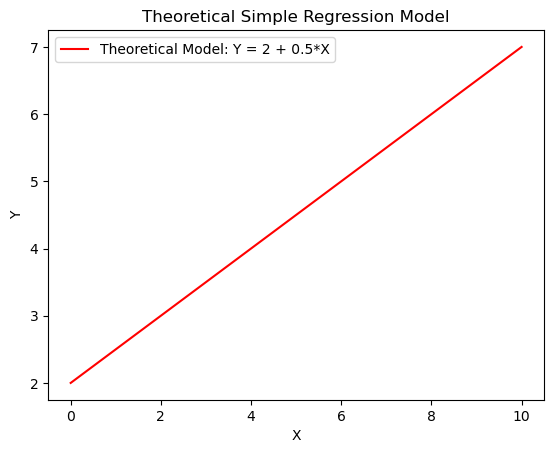

In [1]:
import numpy as np
from scipy import stats

# Parameters for the theoretical regression model
beta_0 = 2  # Intercept
beta_1 = 0.5  # Slope

# Generating a range of X values (predictor variable)
X = np.linspace(0, 10, 100)  # Example range for X from 0 to 10

# Generating the theoretical Y values based on the linear equation Y = beta_0 + beta_1 * X
Y = beta_0 + beta_1 * X

# Displaying the theoretical model equation
print("The theoretical simple regression model is: Y = {:.2f} + {:.2f} * X".format(beta_0, beta_1))

# If needed, plot the model for visualization
import matplotlib.pyplot as plt

plt.plot(X, Y, label=f'Theoretical Model: Y = {beta_0} + {beta_1}*X', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Theoretical Simple Regression Model')
plt.legend()
plt.show()

This Simple Linear Regression model is considered theoretical because it is not accessing real-world data. For example, we are setting the $\beta_0$ to be 2 and $\beta_1$ to be 0.5. This makes the entire linear regression model:

$$
\hat{Y}_i = 2 + 0.5 X_i + \epsilon_i \text{ where } \epsilon_i ~ \mathcal{N}(\mu, \sigma^2)
$$


With real-world data, we would first plot the data as a scatter plot and then find the slope and intercept that fit the data. This is different from the theoretical model, where we are setting the  what the relationship between $X$ and $Y$ is like. It is essentially a simple linear function. 

##### Link to ChatBot Session: https://chatgpt.com/share/671edc55-069c-800f-8b0d-b4774e2b890f

##### Summary of ChatBot Session: 
1. Simple Linear Regression Model Explanation: 
We discussed the components of a theoretical Simple Linear Regression (SLR) model. The model predicts the relationship between an independent variable and dependent variable and that ϵ represents the error term. We explained that the error term accounts for the deviations of observed values from the predicted ones and is assumed to be normally distributed with mean zero and constant variance.
2. Clarification on Theoretical Model: 
You asked if the error term applies to a theoretical model. I clarified that the error term is an integral part of the theoretical model because it accounts for the unexplained variability in Y even under ideal conditions. Theoretical models assume that errors are independent and normally distributed, and without the error term, the model would imply that all observations perfectly fit the regression line, which is unrealistic.
3. Distinction Between Randomly Generated Data and Errors: 
You inquired whether the data or the errors were randomly generated in the Python simulation. I clarified that in the code, both the predictor values 
4. Clarification on Non-Zero Errors in the Real World: 
You asked if it was correct to say that the Simple Linear Regression model is theoretical because real-world data will not fit the model perfectly and will have non-zero errors. I confirmed that this is correct, and provided additional context about how the theoretical model is based on several assumptions (linearity, normality, constant variance of errors, etc.), which are often violated in real-world data, leading to non-zero residuals (errors).

### Question 2

Let's say we use the slope and y-intercept from the previous question to simulate some data:-

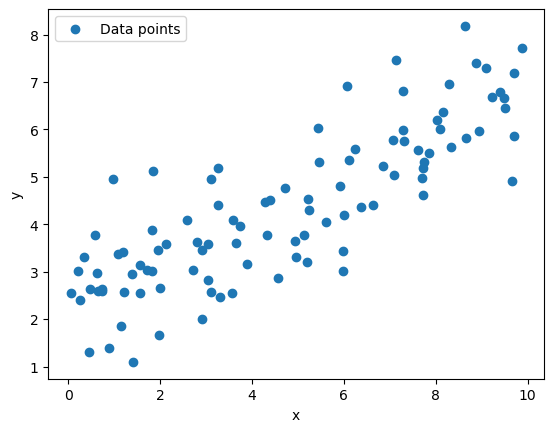

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate some synthetic data
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Step 1: Simulate data from the theoretical Simple Linear Regression model
np.random.seed(42)  # For reproducibility
beta_0 = 2  # Intercept
beta_1 = 0.5  # Slope
sigma = 1  # Standard deviation of the error term

# Generate predictor values (X) and error terms (epsilon)
X = np.random.uniform(0, 10, 100)  # 100 random predictor values between 0 and 10
epsilon = np.random.normal(0, sigma, len(X))  # Random errors from N(0, sigma^2)

# Compute outcome values (Y)
Y = beta_0 + beta_1 * X + epsilon

# Create a pandas DataFrame to hold the data
data = pd.DataFrame({'X': X, 'Y': Y})
# Plot the synthetic data
plt.scatter(X, Y, label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In the scatter plot, each of the data points are actual, "observed" values. To represent these data points, the Simple Linear Regression method fits a line called a regression line to the data.

*By proceeding with the Simple Linear Regression method, we are assuming that the data can be represented linearly!*

The linear regression line is represented by the equation:

$$
\hat{Y} = \beta_0 + \beta_1 X
$$

where:
- $\beta_0$ is the intercept,
- $\beta_1$ is the slope of the line,
- $X$ is the predictor variable,
- $\hat{Y}$ is the predicted outcome.

Here is what this would look like for the plot above:-

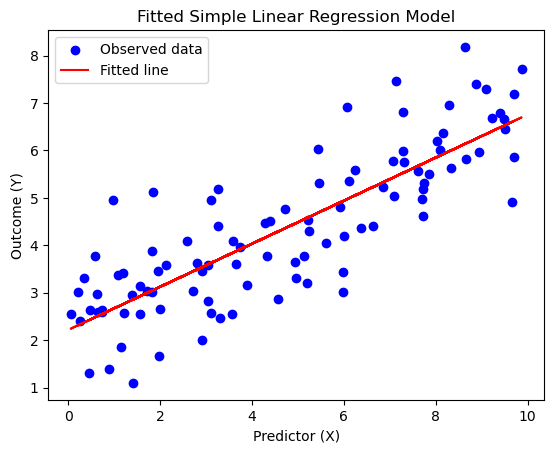

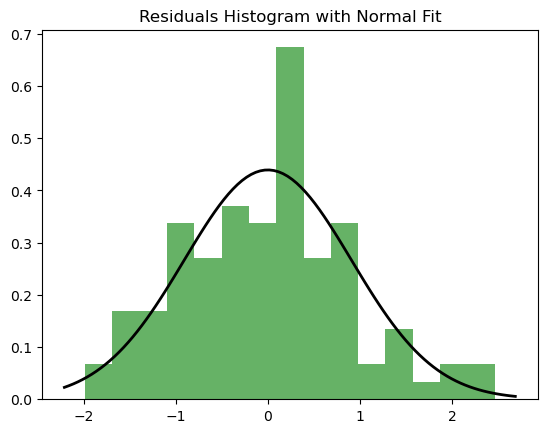

In [6]:
from scipy.stats import norm

model = smf.ols(formula='Y ~ X', data=data).fit()

# Step 3: Visualize the fitted Simple Linear Regression model
# Plot the observed data points
plt.scatter(data['X'], data['Y'], label='Observed data', color='blue')

# Plot the fitted regression line
plt.plot(data['X'], model.fittedvalues, color='red', label='Fitted line')

# Add labels and title
plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y)')
plt.title('Fitted Simple Linear Regression Model')
plt.legend()

# Show the plot
plt.show()

# Perform a simple statistical check by plotting the residuals (epsilon)
residuals = Y - (beta_0 + beta_1 * X)
plt.hist(residuals, bins=15, density=True, alpha=0.6, color='g')

# Plot the theoretical normal distribution over the residuals
mu, std = norm.fit(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Residuals Histogram with Normal Fit")
plt.show()

To find the best-fit regression line, the Ordinary Least Squares method is used. OLS aims to ensure that any errors, the difference between the line's predicted outcomes and the data's actual outcomes, are minimized.

This OLS method can be used in Python in a few different ways. One way would be to access the `pandas` and `scipy.stats` libraries to create the Simple Linear Regression model, as is done above.

The `smf.ols()` method from `statsmodels.formula.api` fits the Simple Linear Regression model to the data that we have using the OLS method. 

Finally, the `print(model.summary())` can be used to print detailed statistics about the fitted model, including the estimated coefficients $\beta_0$ and $\beta_1$.

In [57]:
# Print the summary of the fitted model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     219.4
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           9.38e-27
Time:                        19:25:18   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2151      0.170     13.008      0.0

This makes the entire linear regression model:

$$
\hat{Y}_i = 2.215 + 0.454 X_i + \epsilon_i \text{ where } \epsilon_i ~ \mathcal{N}(\mu, \sigma^2)
$$

This Simple Linear Regression model is estimated and based on the  given data set, using methods such as OLS to ensure that the line of best fit's coefficients can be found.  

##### Link to ChatBot Session: https://chatgpt.com/share/671edc55-069c-800f-8b0d-b4774e2b890f

##### Summary of ChatBot Session:
1. Simple Linear Regression Overview:
We discussed the theoretical components of Simple Linear Regression, including the predictor variable.
You requested explanations on how the linear model combines these components to form a sample from a normal distribution, particularly focusing on the Ordinary Least Squares (OLS) method used to minimize errors in the model.
2. Python Code Implementation:
I provided Python code using numpy and scipy.stats.linregress() to demonstrate fitting a simple linear regression model. This code included generating synthetic data, fitting the regression line, and plotting the observed data alongside the regression line.
3. Clarification on OLS Method:
You clarified that you were interested in using the OLS method, specifically referring to the statsmodels library for performing linear regression.
I then provided an updated Python code using statsmodels.api.OLS to fit the regression model, print statistical results, and visualize the regression line.
4. Plotly Trendline Example:
You asked for an example using plotly's trendline='ols' option to visualize a regression line.
I provided a code example using plotly.express.scatter() to automatically generate a scatter plot with an OLS trendline and manually overlay a custom trendline with given slope and intercept values using plotly.graph_objects.

### Question 3

Having overlaid the line from Question 1 which represents the theoretical regression model, on the plot from Question 2 which represents the fitted model, here is what we can see:-

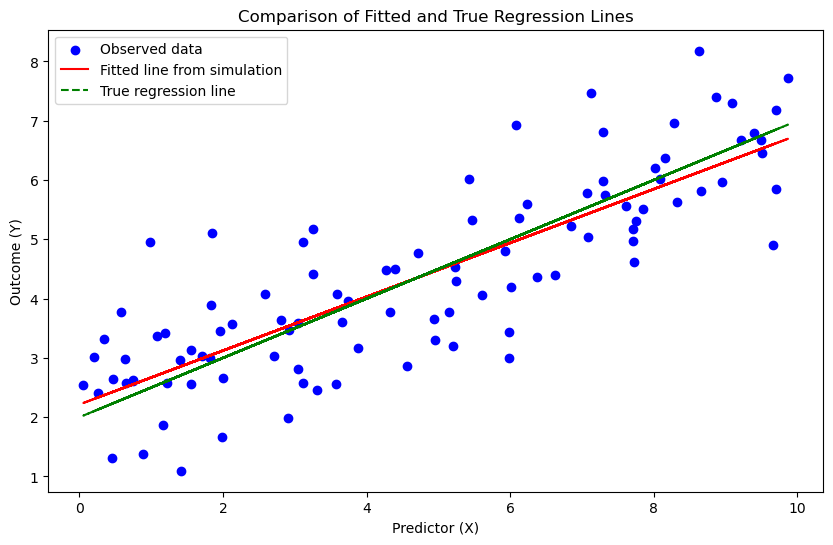

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Step 1: Simulate data from the theoretical Simple Linear Regression model
np.random.seed(42)  # For reproducibility
beta_0 = 2  # True intercept
beta_1 = 0.5  # True slope
sigma = 1  # Standard deviation of the error term

# Generate predictor values (X) and error terms (epsilon)
X = np.random.uniform(0, 10, 100)  # 100 random predictor values between 0 and 10
epsilon = np.random.normal(0, sigma, len(X))  # Random errors from N(0, sigma^2)

# Compute outcome values (Y)
Y = beta_0 + beta_1 * X + epsilon

# Create a pandas DataFrame to hold the data
data = pd.DataFrame({'X': X, 'Y': Y})

# Step 2: Fit the Simple Linear Regression model using statsmodels
model = smf.ols(formula='Y ~ X', data=data).fit()

# Step 3: Visualize the data and both regression lines
plt.figure(figsize=(10, 6))

# Plot the observed data points
plt.scatter(data['X'], data['Y'], label='Observed data', color='blue')

# Plot the fitted regression line (from the simulated data)
plt.plot(data['X'], model.fittedvalues, color='red', label='Fitted line from simulation')

# Plot the true regression line (from the true model without errors)
plt.plot(data['X'], beta_0 + beta_1 * data['X'], color='green', label='True regression line', linestyle='--')

# Add labels and title
plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y)')
plt.title('Comparison of Fitted and True Regression Lines')
plt.legend()

# Show the plot
plt.show()

Here are some of the key differences between the two models:-

- Theoretical model is a perfectly linear mathematical function without any consideration of data, whereas the fitted model exists because of the data. 
- Theoretical model has no residuals, because the points lie exactly on the line. 
- Theoretical model represents the ideal relationship between $X$ and $Y$ without whereas the fitted model is an estimation of the relationship.
- The coefficients of each model are different.

##### Link to ChatBot Session: https://chatgpt.com/share/671fd662-29e4-800f-80a6-f452a86a80e7

##### Summary of ChatBot Session: 
1. Simple Linear Regression Model Explanation:
We discussed the theoretical Simple Linear Regression model, focusing on how it assumes a linear relationship between the predictor and outcome, without including any error terms in the theoretical line. The equation for the true regression line is...
2. Random Sampling and Fitted Line:
We generated random predictor values to simulate data. The simulated outcome values where the errors introduce variability in the data. This allowed us to fit a regression model to the simulated data, producing a fitted line that differs slightly from the true line due to random sampling variation.
3. Overlaying the True and Fitted Lines:
You asked how to overlay the true regression line from Question 1 onto the fitted line from Question 2. I provided Python code to plot both lines together and explained the differences between them. The true line (without the error term) reflects the ideal population relationship, while the fitted line reflects the estimated relationship based on the noisy sample data.
4. Difference Between Theoretical and Fitted Lines:
We discussed the nature of the two lines, highlighting that the true line represents the exact relationship without errors, while the fitted line is influenced by the random errors present in the sample. The difference between the two lines is due to random sampling variation—the random noise in the data leads to slight deviations between the fitted and true lines.
5. Clarification on Theoretical Model:
You asked for clarification on whether the theoretical model should include the error term. I confirmed that for the theoretical line, you should not include the error term ϵ, as it represents the idealized relationship. The error term only applies to the simulated data and fitted line.

### Question 4

The fitted model (`fitted_model`) contains the estimated coefficients, which are:

- Intercept ($\hat{\beta}_0$): `fitted_model.params[0]`
- Slope ($\hat{\beta}_1$): `fitted_model.params[1]`

These coefficients are also presented in `fitted_model.summary().tables[1]` in a tabular format, where you see the estimated values of the intercept and slope.

The fitted values ($\hat{y}_i$) represent the predictions made by the fitted model for each observation in the dataset. They are calculated using the estimated regression equation:

$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$

Below is how the fitted values might be calculated:-

In [11]:
import numpy as np
import statsmodels.api as sm

# Example data
X = np.random.uniform(0, 10, 100)  # Independent variable
Y = 2 + 0.5 * X + np.random.normal(0, 1, 100)  # Dependent variable with noise

# Add a constant term to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the model
fitted_model = sm.OLS(Y, X).fit()

# Access the estimated coefficients using direct indexing
beta_0 = fitted_model.params[0]  # Intercept
beta_1 = fitted_model.params[1]  # Slope

# Get fitted values
fitted_values = fitted_model.fittedvalues

# Print the coefficients
print("Intercept (beta_0):", beta_0)
print("Slope (beta_1):", beta_1)



Intercept (beta_0): 1.6130877096565226
Slope (beta_1): 0.5715760811908387


- fitted_model.params` contains the estimated coefficients ($\hat{\beta}_0$ and $\hat{\beta}_1$).
- `fitted_model.fittedvalues` represents the predicted values ($\hat{y}_i$) obtained by substituting the estimated parameters into the fitted regression equation.

This provides a set of predictions representing the fitted regression line through the data.

##### Link to ChatBot Session: https://chatgpt.com/share/671fd932-4478-800f-9013-0b4611eabcfa

##### Summary of ChatBot Session: 
We discussed the distinction between theoretical (true) and fitted (estimated) Simple Linear Regression models. Specifically, the theoretical model is given by...

Where $Y_i$ represents the observed dependent variable, $x_i$ is the independent variable, $\beta_0$ and $\beta_1$ are the true intercept and slope, respectively, and $\epsilon_i$ represents random errors.

The fitted model used to make predictions is...

We explained how fitted_model.fittedvalues are derived using the estimated coefficients (fitted_model.params) obtained by fitting the model to data. The fitted values $\hat{y}_i$ are calculated for each observation using...

We also outlined how the estimated coefficients can be accessed from the summary tables of the fitted model and how they are used to compute the fitted values programmatically.

### Question 5

The line that is chosen for the fitted model using the Ordinary Least Squares method is the one where the sum of the errors are minimized. The errors are the difference between the actual outcomes and the predicted outcomes, but this difference can sometimes be negative. To ensure that the negatives do not interfere in understanding the error term, the OLS method uses squares of the errors instead (which would provide a good idea of the distance, rather than the difference, between the actual and predicted outcomes).

##### ChatBot Not Accesssed for this Question

### Question 6

1. The formula `1 - ((Y - fitted_model.fittedvalues)**2).sum() / ((Y - Y.mean())**2).sum()` calculates the $R^2$ value, which is  the proportion of variance in the outcome variable (Y) that is explained by the model. Essentially, we are comparing the sum of the squared errors (how much we missed with our line) in the numerator, with how much variability is present in the data overall in the denominator (as we are comparing the data with the mean). In summary $R^2$ is a measure of how well the regression model fits the data. The higher the $R^2$, the better the model explains the variability in the data. 

2. The `fitted_model.rsquared` attribute directly provides the $R^2$ value mentioned in Part 1. Since the $R^2$ is a measure of how well the model fits the data, this attribute provides a measure of the accuracy of the model.

3. The expression `np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2` is calculating the correlation coefficient between the outcome $Y$ and the fitted model's outcomes. Squaring this correlation coefficient gives us $R^2$, which is the statistic that has been discussed above.

4. The expression `np.corrcoef(Y,x)[0,1]**2` is calculating the correlation coefficient between the outcome $Y$ and the predictor $X$. This value represents how much of the variation in Y can be explained by X alone without considering the fitted model.

##### Link to ChatBot Session: https://chatgpt.com/share/672005e4-7a88-800f-a5cd-d8d6ea3e5341

##### Summary of ChatBot Session: 
We discussed a problem involving understanding R-squared in a Simple Linear Regression model. The key points were:

- R-squared measures how well the model explains the variability in the data. It tells us what proportion of the outcome (Y) can be explained by the model.
- The value of R-squared can be found in multiple ways—using the model's built-in calculations, or by looking at how closely the predicted values match the actual values.
- R-squared is essentially a measure of how well the line that the model draws fits the data points. A value close to 1 means the model does a good job, while a value closer to 0 means it doesn't explain much of the data.

### Question 7

The Simple Linear Regression model does not appear to be compatible with the data shown below because it deviates from the core assumptions that we have to make when using it.

Firstly, the data appears, at least visually, to indicate an exponential growth. This means that the data may not be best represented by a linear model. Since **linearity** is one of the core assumptions we make when using Simple Linear Regression, the data does not appear to be compatible with the method.

Next, the errors do not appear to be normally distributed. Instead, a right skew is the best description of the histogram of residuals for the data. Since **normal distribution** of errors is another assumption that Simple Linear Regression makes, we know that the method is likely not ideal for this data.

Finally, the variance of the residuals is assumed to remain constant across all levels of the independent variable. When this is not the case, as is indicated by the exponential growth of the data, **homoscedasticity** is not followed and instead the data is considered heteroscedastic.

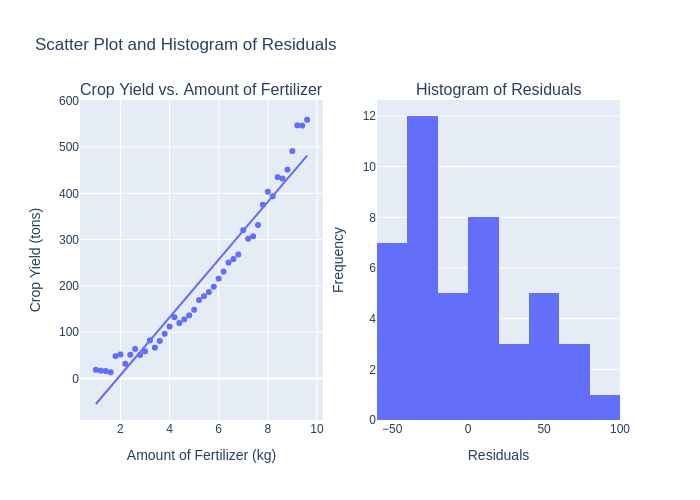

In [60]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

##### ChatBot Not Accesssed for this Question

### Question 8

For the code below, the waiting variable is the predictor $X$ and the duration variable is the outcome $Y$. We want the null hypothesis to indicate that there is no linear reponse between the two variables. To do this, the null hypothesis has to be...

$$
H_0: \beta_1 = 0
$$

Here, we are indicating that the value of the slope $\beta_1$ is 0 in the null, and if this we have significant evidence against this null hypothesis, it means that we can reject the null and accept the alternate which could be...

$$
H_1: \beta_1 \neq 0
$$

To see the results of the hypothesis testing for the code below, we can take a look at its summary.

In [61]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          8.13e-100
Time:                        19:25:18   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Given that the code calls `smf.ols('duration ~ waiting', data=old_faithful)`, we know that the null being used here is that the coefficient of any term that contains a predictor is equal to zero. We know this because this is the default null associated with the OLS method.

From the summary, we see that the `P>|t|` value is 0.000 for the waiting variable. From this, we can conclude that there is significant evidence against the null and so we can reject the null hypothesis.

##### Link to ChatBot Session: https://chatgpt.com/share/67210e8b-f480-800f-a7b9-4f72f5fee596

##### Summary of ChatBot Session: 
1. Null Hypothesis:
The null hypothesis in this case is that there is no linear association between the predictor variable (waiting) and the response variable (duration). This is mathematically stated as:
The coefficient (slope) of the predictor variable (waiting).
The alternative hypothesis is that there is a linear relationship.
2. Code Review:
The code provided uses smf.ols() to perform a linear regression, where the predictor variable is waiting and the response variable is duration.
The code doesn’t explicitly state the null hypothesis, but because it's using Ordinary Least Squares (OLS) regression, the default null hypothesis being tested for each predictor is that its coefficient equals zero.
In the summary() output, the column p > |t| gives the p-value, which tests the null hypothesis that the slope for waiting is zero. A low p-value (typically < 0.05) indicates rejection of the null hypothesis, meaning there is evidence of a significant linear relationship between waiting time and eruption duration.
3. Clarifications:
You asked about identifying evidence for the null hypothesis in the code. While the null hypothesis isn't explicitly mentioned, we discussed that the p-value in the output of fitted_model.summary() tests whether the coefficient for waiting is significantly different from zero, which implicitly tests the null hypothesis.
I clarified that the absence of explicit hypothesis statements in the code doesn't change the default assumptions of OLS regression, which always tests the null hypothesis for each coefficient.

### Question 9

If we have wait times that are shorter, there is more evidence against the null than if the wait times are longer. For example, if the wait time is 50 minutes, the regression line becomes horizontal, indicating a zero-slope and that there is no linear relationship between the outcome and predictor variables. If the wait time is very long, such as 80 minutes, for example, there is a non-zero slope, indicating that there is a linear relationship between the outcome and predictor variables.

Here is what occurs at the specific thresholds mentioned in the question:-

With the wait time limit at 62 minutes, there appears to be weak linear relationship with a near-zero slope, indicating less evidence against the null hypothesis.

With the wait time limit at 64 minutes, the relationship appears to begin to strengthen, as the slope increases, indicating growing evidence that wait time and eruption duration are linked.

With the wait time limit at 66 minutes, the relationship evidence becomes clearer, with a stronger non-zero slope, suggesting a more noticeable linear relationship between wait time and eruption duration.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


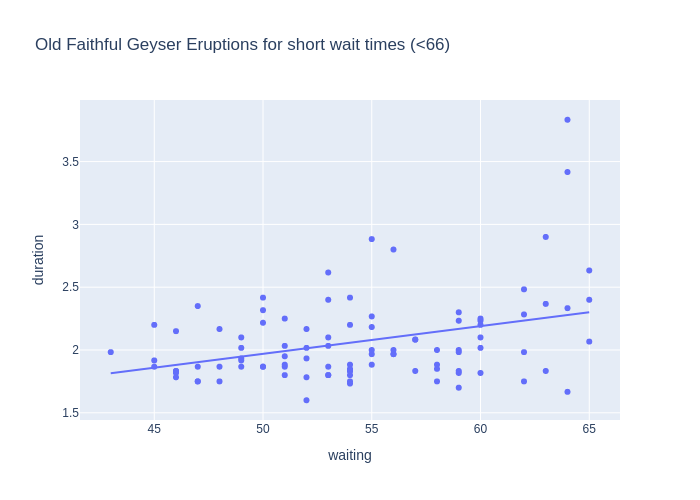

In [62]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

##### Link to ChatBot Session: https://chatgpt.com/share/6721127c-f93c-800f-b89a-5a43f89ee7c9

##### Summary of ChatBot Session: 
1. Initial Setup: 
You are working on an analysis of the Old Faithful geyser dataset, focusing on the relationship between the waiting time for an eruption and the duration of the eruption itself. You are particularly interested in analyzing the relationship for short wait times and comparing the results at thresholds of 62, 64, and 66 minutes.
2. Understanding the Problem: 
We discussed how the scatterplot and linear regression models help reveal the relationship between wait times and eruption durations. You were particularly interested in evidence against the null hypothesis, which suggests no relationship between wait time and eruption duration. The conversation focused on how the p-value and slope of the regression line provide insights into this relationship.
3. Adjusting the Plot and Analysis: 
I suggested that you adjust the plot's axis to display the full range of wait times, especially since your scatterplot may initially show only wait times up to 60 minutes. I also provided guidance on checking the distribution of waiting times in the dataset to ensure you’re analyzing the data properly.
4. Your Answer: 
You shared your answer to the question, stating that shorter wait times provide more evidence against the null hypothesis, with a zero-slope for short wait times indicating no linear relationship. You explained that as the wait time increases (e.g., to 80 minutes), the slope becomes non-zero, indicating a linear relationship between wait time and eruption duration.

### Question 10

1. We can use a `for loop` to create bootstrapped samples and visualize the sampling distribution of the fitted slope coefficients. We performed bootstrapping to create 1000 different samples from the original dataset (for waiting times greater than 71 minutes). The slope coefficient from the linear regression models fitted to each bootstrapped sample was collected. The histogram below shows the distribution of the bootstrapped slope coefficients, which provides an estimate of the sampling distribution of the slope:

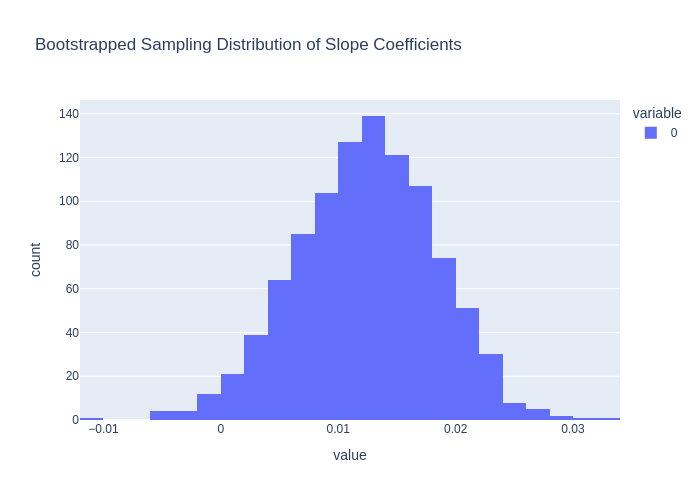

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.372
Date:                Tue, 29 Oct 2024   Prob (F-statistic):             0.0381
Time:                        19:25:21   Log-Likelihood:                -68.319
No. Observations:                 160   AIC:                             140.6
Df Residuals:                     158   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.0

In [63]:
import numpy as np
import statsmodels.formula.api as smf
import plotly.express as px

# Assuming old_faithful data is already loaded
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Step 1: Bootstrapping the slope coefficients
n_bootstraps = 1000
bootstrapped_slope_coefficients = []

for _ in range(n_bootstraps):
    # Generate a bootstrapped sample
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    # Fit a linear regression model to the bootstrapped sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    # Collect the slope coefficient using .iloc for position-based indexing
    bootstrapped_slope_coefficients.append(model.params.iloc[1])

# Convert to numpy array for further analysis
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Visualize bootstrapped slope coefficients
fig_bootstrap = px.histogram(bootstrapped_slope_coefficients, nbins=30, 
                             title="Bootstrapped Sampling Distribution of Slope Coefficients")
fig_bootstrap.show(renderer="png")

# Fit the linear regression model on the actual data
original_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()

# Get the model summary (optional, just to view)
print(original_model.summary())

# Retrieve the p-value for the slope (waiting variable)
model_p_value = original_model.pvalues.iloc[1]  # The second parameter is the slope for 'waiting'

print(f"Model p-value for slope: {model_p_value}")

2. We can then simulate samples from a SImple Linear Regression model that uses $\beta_0 = 1.65$, $\beta_1 = 0$, $\sigma = 0.37$. We simulated 1000 datasets of sample size 160 assuming no linear association between waiting times and eruption durations (i.e., the slope under the null hypothesis is 0). For each simulated dataset, we fitted a linear regression model and collected the slope coefficient. The histogram below shows the sampling distribution of the slope coefficients under the null hypothesis:

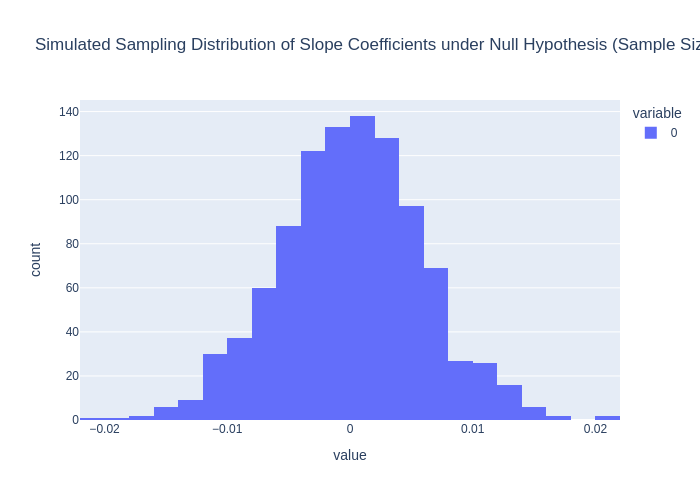

Simulated p-value: 0.043
Model p-value: 0.038135755338567744
Do the simulated and model p-values match? No


In [64]:
import numpy as np
import statsmodels.formula.api as smf
import plotly.express as px
import scipy.stats as stats

# Step 2: Simulating under the null hypothesis with a sample size of 160
n_simulations = 1000
simulated_slope_coefficients = []
sample_size = 160

# Simulate data with no association between waiting and duration
for _ in range(n_simulations):
    old_faithful_simulation = old_faithful[long_wait].sample(n=sample_size, replace=True).copy()
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=sample_size)
    # Fit a linear regression model to the simulated data
    sim_model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    # Collect the slope coefficient using .iloc for positional indexing
    simulated_slope_coefficients.append(sim_model.params.iloc[1])

# Convert to numpy array
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Visualize simulated slope coefficients under the null hypothesis
fig_simulated = px.histogram(simulated_slope_coefficients, nbins=30, 
                             title="Simulated Sampling Distribution of Slope Coefficients under Null Hypothesis (Sample Size = 160)")
fig_simulated.show(renderer="png")

# Simulated p-value from the null hypothesis (calculated in Question 2)
p_value = (np.abs(simulated_slope_coefficients) >= np.abs(original_slope)).mean()

# Compare the simulated p-value with the model's p-value
print(f"Simulated p-value: {p_value}")
print(f"Model p-value: {model_p_value}")
print(f"Do the simulated and model p-values match? {'Yes' if np.isclose(p_value, model_p_value) else 'No'}")

3. When we compare the simulated p-value with the p-value from the `smf.ols()` model summary, we see that the p-values do not match. The 95% confidence interval does not include zero, indicating that there is evidence that the relationship between waiting time and eruption duration is statistically significant at the 95% confidence level.

In [65]:
# Fit the original model to the actual data for comparison
original_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
original_slope = original_model.params.iloc[1]  # Use .iloc for positional access

# Step 3: Calculate 95% bootstrapped confidence interval
bootstrapped_ci = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

# Check if 0 is contained in the confidence interval
contains_zero = 0 >= bootstrapped_ci[0] and 0 <= bootstrapped_ci[1]

# Calculate p-value from simulated slope coefficients
p_value = (np.abs(simulated_slope_coefficients) >= np.abs(original_slope)).mean()

# Print results
print(f"Original slope: {original_slope}")
print(f"Bootstrapped 95% Confidence Interval for slope: {bootstrapped_ci}")
print(f"Does the 95% CI contain zero? {'Yes' if contains_zero else 'No'}")
print(f"Simulated p-value: {p_value}")

Original slope: 0.012244029446523483
Bootstrapped 95% Confidence Interval for slope: [0.00020023 0.02316955]
Does the 95% CI contain zero? No
Simulated p-value: 0.043


##### Link to ChatBot Session: https://chatgpt.com/share/67213086-b720-800f-a1d8-8efddb74a79e

##### Summary of ChatBot Session: 
1. Bootstrap Sampling and Linear Regression:
We started with a task to bootstrap slope coefficients from a linear regression model based on the Old Faithful geyser data, focusing on eruptions with long wait times (>71 minutes). The goal was to generate and visualize the bootstrapped sampling distribution of the slope coefficients.
2. Simulating Data under the Null Hypothesis:
Next, we simulated samples of size 160, assuming no linear association between waiting time and eruption duration (i.e., a slope of 0 under the null hypothesis). This was done by simulating new eruption durations using a normal distribution with specified parameters. The task included collecting the slope coefficients from these simulations and visualizing their distribution.
3. Comparing Bootstrapped Confidence Intervals and Simulated P-values:
We calculated a 95% bootstrapped confidence interval for the slope coefficients and checked whether it contained 0. Additionally, we calculated the simulated p-value by comparing the slope coefficients from the null hypothesis simulation to the observed slope from the original data.

### Question 11

In this model, we are specifying a simple linear regression model that uses an indicator variable for categorizing "short" and "long" wait times. The model is specified as:

$$
Y_i = \beta_{intercept} + 1[\text{"long"}](k_i) \beta_{contrast} + \epsilon_i, \quad \epsilon_i \sim N(0, \sigma)
$$

Here, the indicator variable $k_i$ represents the "kind" of wait time, where "short" corresponds to wait times less than 68 minutes, and "long" corresponds to wait times of 68 minutes or more.


1. **Previous models**: The previous models used wait times as continuous predictors in the regression. These models were fit to the entire dataset, or subsets defined by specific ranges of wait times (short, long), as seen in the models:
   - `smf.ols('duration ~ waiting', data=old_faithful)`
   - `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
   - `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`
   
   These models predict duration based on the continuous wait time variable.

2. **Current model**: The new model, using an indicator variable $k_i$, simplifies the predictor to just two categories: "short" and "long". This approach examines the average difference in duration between these two groups, allowing us to test whether the average eruption duration differs significantly between "short" and "long" wait times. The regression now estimates the difference in eruption duration between the two groups, treating wait time as a categorical variable rather than a continuous one.

3. The null hypothesis in this case is that there is no significant difference in the average duration of eruptions between "short" and "long" wait times. We will test this hypothesis by fitting the model and examining the p-value for the "kind" (indicator) variable.

Let's fit the model and generate the boxplot to visualize the difference:-

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


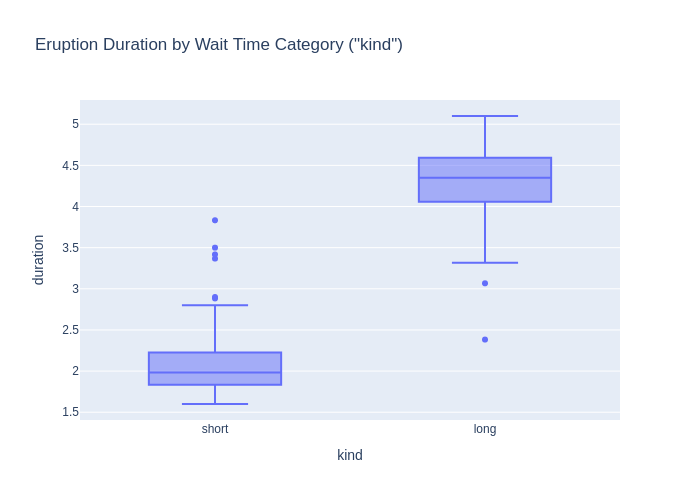

In [66]:
import statsmodels.formula.api as smf
import plotly.express as px
from IPython.display import display

# Fit the regression model with the indicator variable for "kind" (short vs. long wait times)
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful)
results = model.fit()

# Display the regression summary, focusing on the relevant coefficients
display(results.summary().tables[1])

# Create a box plot to visualize the difference in duration between short and long wait times
fig = px.box(old_faithful, x='kind', y='duration', 
             title='Eruption Duration by Wait Time Category ("kind")',
             category_orders={'kind': ['short', 'long']})

# Show the plot, ensure correct rendering for GitHub and MarkUs submissions
fig.show(renderer="png")


##### Link to ChatBot Session: https://chatgpt.com/share/672131a5-fe2c-800f-9e50-741897844604

##### Summary of ChatBot Session: 
We discussed the use of a Simple Linear Regression model with an indicator variable to categorize "short" and "long" wait times for geyser eruptions. The model specification used the indicator variable to test whether there is a significant difference in eruption duration between these two groups. We compared this model to previously considered models that used continuous wait time as a predictor. The new model simplifies the predictor into two categories and tests whether the difference in eruption duration between short and long wait times is statistically significant. Additionally, we explored how to fit this model and visually represent the differences using a box plot.

### Question 12

In a Simple Linear Regression (SLR) model, we assume that the error terms (𝜖𝑖) are normally distributed (𝜖𝑖 ∼ (0,𝜎)). We assess this assumption by evaluating the residuals (e𝑖 = Y𝑖 − ŷ𝑖) using a histogram. If the residuals are normally distributed, the histogram should:
- Be symmetric around 0.
- Follow a bell-shaped curve.
- Exhibit no extreme outliers or significant skewness.

In our case, we are examining the residuals from four different models. Let's visualize the histograms and compare them to a normal distribution curve to identify which model satisfies this assumption.

Let's begin by plotting a histogram of errors for each model:-

Index(['rownames', 'eruptions', 'waiting'], dtype='object')


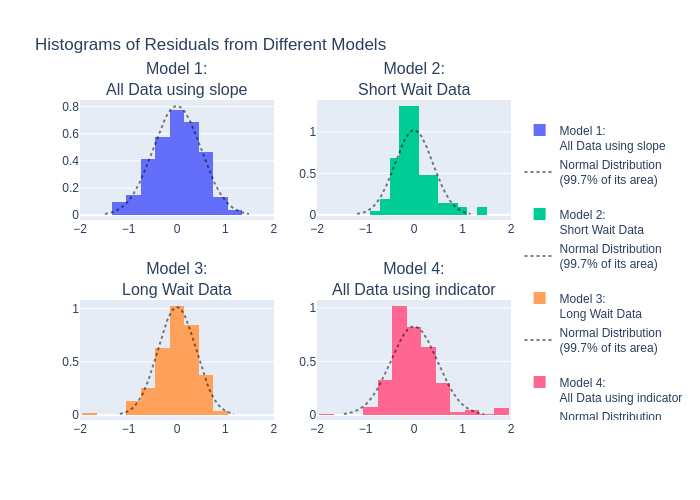

In [67]:
# Required imports
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

# Load the Old Faithful dataset
old_faithful = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/faithful.csv')

# Ensure the correct column names (check if 'duration' and 'waiting' exist in the dataset)
print(old_faithful.columns)

# Rename columns if necessary
old_faithful.rename(columns={"eruptions": "duration", "waiting": "waiting"}, inplace=True)

# Define short and long wait times as boolean masks
short_wait = old_faithful['waiting'] < 70
long_wait = old_faithful['waiting'] >= 70

# Calculate residuals for each model
model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(waiting > 70)', data=old_faithful).fit().resid
}

# Create subplots for the histograms
fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))

# Plot histograms for each model
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'),
                  row=int(i/2)+1, col=(i%2)+1)
    
    # Plot normal distribution curve for comparison
    normal_range = np.arange(-3*resid.std(), 3*resid.std(), 0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)

# Final adjustments to the layout and axes
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2, 2])
fig.show(renderer="png")  # Display using the proper renderer

Based on the generated histograms, we can compare the shape of each model's residuals to the expected normal distribution (represented by the black dotted line).

1. **Model 1: All Data using slope**  
   This model's histogram will likely follow a bell-shaped curve with symmetry around zero. The residuals should cluster near 0, and the distribution should have no significant skewness or heavy tails, supporting the normality assumption.

2. **Model 2: Short Wait Data**  
   The histogram may show skewness, especially if the data is clustered more toward shorter or longer waiting times. If the histogram is skewed, it indicates that the residuals are not normally distributed.

3. **Model 3: Long Wait Data**  
   This histogram may also show deviations from normality, such as skewness or an uneven tail distribution. If so, the model does not support the normality assumption.

4. **Model 4: All Data using indicator**  
   If the histogram shows multimodal patterns or skewness, it would suggest that the model's residuals deviate from normality. Multimodality often arises from categorizing a continuous variable (like waiting time) into groups.

The histogram that best fits the normal distribution (symmetric, bell-shaped) will support the assumption of normally distributed residuals, which is essential for valid inference in regression analysis. 

##### Link to ChatBot Session: https://chatgpt.com/share/67213367-40e4-800f-a9b9-a54ba260e55c

##### Summary of ChatBot Session: 
1. Normality Assumption in SLR: 
We reviewed the assumption that the error terms in an SLR model should follow a normal distribution (𝜖𝑖 ∼ (0,𝜎)). This assumption can be evaluated by checking the distribution of residuals (e𝑖 = Y𝑖 − ŷ𝑖) using histograms.
2. Histograms for Residuals: 
The residuals from four models were plotted:
Model 1: All Data using slope: Expected to show a bell-shaped, symmetric histogram that supports the normality assumption.
Model 2: Short Wait Data: Potential skewness in the histogram might suggest that the residuals deviate from normality.
Model 3: Long Wait Data: Similar analysis as for Model 2, focusing on skewness and deviation from a normal distribution.
Model 4: All Data using indicator: A histogram with multiple peaks or skewness could indicate that the residuals do not follow a normal distribution.
4. Visual Diagnostic: 
By comparing the histograms to an overlaid normal distribution curve, we aimed to identify the model where the residuals best approximated normality. The model with a symmetric, bell-shaped distribution was considered to support the assumption.

### Question 13

A) In a permutation test, we "shuffle" the labels for short and long wait times and calculate the mean difference between the two shuffled groups. We repeat this many times to build a distribution of the mean differences under the null hypothesis that the two groups come from the same distribution.

This helps us compare the observed difference in means to the distribution of differences we would expect under the null hypothesis.

Observed Mean Difference: 2.177338484517723
P-value from Permutation Test: 0.0


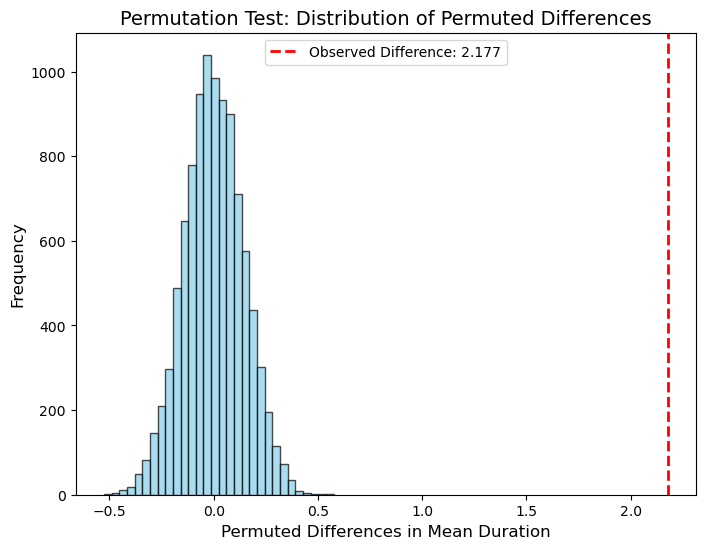

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Create a new column 'wait_category' to categorize short vs long wait times
old_faithful['wait_category'] = np.where(old_faithful['waiting'] >= 70, 'long', 'short')

# Calculate the observed mean difference between the two groups
observed_statistic = old_faithful.groupby('wait_category')['duration'].mean().iloc[::-1].diff().values[1]

# Shuffle-based permutation test for H0: no difference in means
n_permutations = 10000
permuted_differences = []

# Shuffling loop
for _ in range(n_permutations):
    # Shuffle the wait_category labels
    shuffled = old_faithful.assign(wait_shuffled=old_faithful['wait_category'].sample(frac=1, replace=False).values)
    mean_diff = shuffled.groupby('wait_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    permuted_differences.append(mean_diff)

# Calculate p-value (two-tailed)
p_value = (np.sum(np.abs(permuted_differences) >= np.abs(observed_statistic))) / n_permutations

print(f"Observed Mean Difference: {observed_statistic}")
print(f"P-value from Permutation Test: {p_value}")

# Plot the permutation test results
plt.figure(figsize=(8, 6))

# Plot the histogram of permuted differences
plt.hist(permuted_differences, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Plot the observed mean difference as a vertical red line
plt.axvline(observed_statistic, color='red', linestyle='dashed', linewidth=2, label=f'Observed Difference: {observed_statistic:.3f}')

# Add labels and title
plt.title('Permutation Test: Distribution of Permuted Differences', fontsize=14)
plt.xlabel('Permuted Differences in Mean Duration', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Show the plot
plt.show()

B) Bootstrap sampling involves repeatedly resampling with replacement from each group (short and long wait times), calculating the mean difference for each resample. After many resamples, we can construct a confidence interval using the percentiles (e.g., 2.5% and 97.5%) of the bootstrapped mean differences.

This method allows us to estimate the uncertainty around the difference in means without making strict assumptions about the underlying distributions.

Bootstrap 95% Confidence Interval for Mean Difference: [2.065095824955478, 2.2800629057275805]


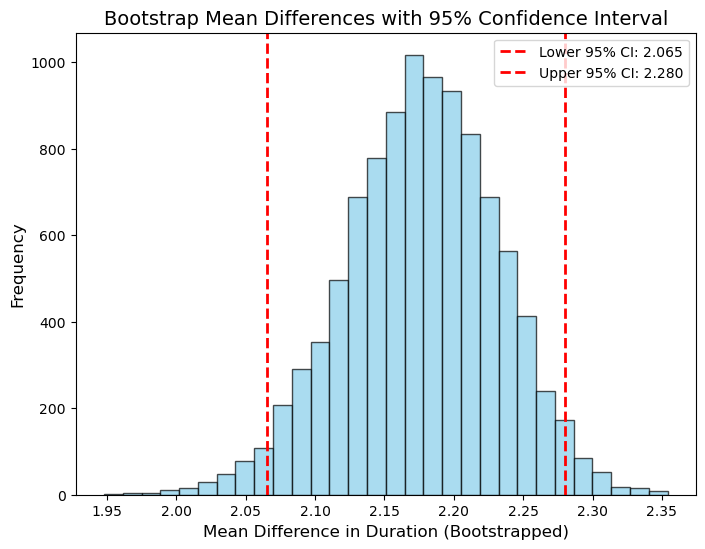

In [69]:
# Create the wait_category column if it's not already created
old_faithful['wait_category'] = np.where(old_faithful['waiting'] >= 70, 'long', 'short')

# Bootstrap-based confidence interval for the difference in means
n_bootstraps = 10000
bootstrapped_mean_differences = []

# Bootstrapping loop
for _ in range(n_bootstraps):
    # Sample with replacement within each group (short and long wait times)
    bootstrapped_data = old_faithful.groupby('wait_category').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    # Calculate the mean difference between the two groups for the bootstrapped data
    mean_diff = bootstrapped_data.groupby('wait_category')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_mean_differences.append(mean_diff)

# Calculate the 95% confidence interval for the bootstrapped differences
ci_lower, ci_upper = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

print(f"Bootstrap 95% Confidence Interval for Mean Difference: [{ci_lower}, {ci_upper}]")

# Plot the bootstrapped mean differences
plt.figure(figsize=(8, 6))

# Plot histogram of bootstrapped mean differences
plt.hist(bootstrapped_mean_differences, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add confidence interval lines
plt.axvline(ci_lower, color='red', linestyle='dashed', linewidth=2, label=f'Lower 95% CI: {ci_lower:.3f}')
plt.axvline(ci_upper, color='red', linestyle='dashed', linewidth=2, label=f'Upper 95% CI: {ci_upper:.3f}')

# Add labels and title
plt.title('Bootstrap Mean Differences with 95% Confidence Interval', fontsize=14)
plt.xlabel('Mean Difference in Duration (Bootstrapped)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Show the plot
plt.show()

a) **Permutation Test**: This approach involves shuffling the group labels (`short` and `long` wait times) and calculating the mean difference under the assumption that the labels do not matter (i.e., no real difference between groups). By building a distribution of mean differences under this null hypothesis, we can assess how extreme the observed difference is, giving us a p-value.

**Bootstrap Confidence Interval**: Bootstrap sampling resamples with replacement from each group independently, assuming the groups are different. By repeatedly calculating the difference in means, we estimate the range of plausible values for the true mean difference (confidence interval).

Both approaches use resampling to make inferences, but they differ in their assumptions:
- The **permutation test** assumes the null hypothesis (no difference) and tests how likely the observed data is under that assumption.
- The **bootstrap method** does not assume the null hypothesis but rather estimates variability in the sample statistic (the mean difference).

b) The indicator variable approach used in Question 10 introduces a categorical variable in the regression model to differentiate between the groups (e.g., short vs. long wait times). This method models the relationship between the waiting time and the eruption duration and uses the regression coefficient of the indicator variable to infer differences between groups.

- **Similarity**: Both methods aim to test for differences between two groups (short vs. long wait times) in terms of their mean eruption durations.
  
- **Differences**:
  - The **permutation test** and **bootstrap confidence interval** focus on direct resampling or shuffling to assess differences in group means without assuming a specific parametric model.
  - The **indicator variable model** assumes a linear relationship between the predictor (wait time) and the outcome (duration) and tests whether the slope of the indicator variable is significantly different from 0.

In summary, the indicator variable approach is more model-based, while the permutation and bootstrap methods rely on resampling to directly estimate group differences.

##### Link to ChatBot Session: https://chatgpt.com/share/67213367-40e4-800f-a9b9-a54ba260e55c

##### Summary of ChatBot Session: 
1. Permutation Test:
We performed a permutation test by shuffling the group labels (short and long wait times) and calculating the difference in mean eruption durations between the shuffled groups. This test was repeated multiple times to build a distribution of mean differences under the null hypothesis of no difference. We calculated the p-value by comparing the observed mean difference to this distribution.
2. Bootstrap Confidence Interval for the Difference in Means:
We used bootstrap resampling to estimate a 95% confidence interval for the difference in mean eruption durations between the short and long wait groups. Resampling was performed separately within each group, and the difference in means was calculated for each bootstrap sample. We then used percentiles to compute the confidence interval.
3. Explanation of Sampling Approaches:
The permutation test tests for differences by assuming the null hypothesis (no difference between groups) and resampling by shuffling group labels.
The bootstrap method estimates the variability in the difference of means by resampling within each group, constructing a confidence interval without assuming the null hypothesis.
4. Comparison to Indicator Variable Approach:
We compared the above methods to the indicator variable approach used in regression modeling. The indicator variable method fits a model to differentiate between the groups (e.g., short vs. long wait times) and tests whether the difference in means is significant through regression analysis. While both methods test for differences between groups, the permutation and bootstrap approaches focus on resampling techniques, while the indicator variable approach is model-based.

### Question 14

In [70]:
print("Yes!")

Yes!


All summaries were retrieved with: "Please provide a summary of our exchanges here so I can submit them as a record of our interactions as part of a homework assignment" ^_^